<a href="https://colab.research.google.com/github/JRyanShue/1898A/blob/main/LDIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  850  833  822  816
  809  805  801  797  794  792  790  787  785  784  783  783  782  781
  780  780  780  780  780  780  781  781  781  782  782  783  784  785
  785  786  787  788  789  790  791  793  794  795  796  797  799  800
  802  804  805  807  809  811  812  814  816  818  820  823  825  827
  830  832  835  837  840  843  845  848  851  854  858  861  864  868
  872  875  879  883  888  892  897  902  907  913  918  925  932  939
  947  955  965  976  989 1006 1034 1228 1246 1262 1277 1289 1299 1306
 1313 1318 1321 1321 1323 1328 1335 1345 1358 1374 1395    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

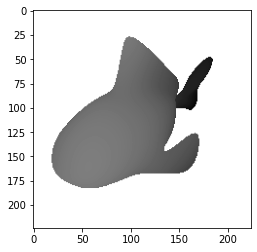

In [2]:
# Show depth image

import cv2
import matplotlib.pyplot as plt

img = cv2.imread('drive/MyDrive/blub/depth_images/000000_depth.png', 
                 cv2.IMREAD_ANYDEPTH)
# print(len(img[0]))
print(img[100])
# plt.imshow(img)
plt.imshow(img, plt.get_cmap('binary'))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


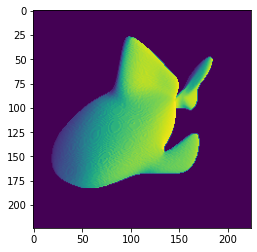

In [3]:
# Show normals example

img = cv2.imread('drive/MyDrive/blub/normals/000000_depth_nx.png', 
                 cv2.IMREAD_ANYDEPTH)
print(img)
plt.imshow(img)

In [4]:
# Test preprocess

import torchvision.transforms as transforms
import torch
import numpy as np
# from PIL import Image

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((np.mean(img)), (np.std(img)))
])
_ = img.astype('float32')
print(_.shape)
input_tensor = preprocess(_)
print(input_tensor[0][100])

(224, 224)
tensor([-0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839,
        -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839,
        -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839,
        -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839,
        -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839,
        -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839, -0.5839,
        -0.5839, -0.5839, -0.5839, -0.5839,  0.0492,  0.1132,  0.1579,  0.2207,
         0.2361,  0.3265,  0.2978,  0.3361,  0.4416,  0.5369,  0.4388,  0.4377,
         0.6179,  0.7245,  0.8637,  0.8635,  0.7078,  0.7073,  0.8432,  1.0097,
         1.0115,  1.0115,  1.0115,  1.1834,  1.1833,  1.0099,  1.1831,  1.1830,
         1.1829,  1.3535,  1.3532,  1.1824,  1.1823,  1.3721,  1.3715,  1.3708,
         1.3701,  1.3694,  1.5083,  1.5073,  1.3671,  1.3664,  1.3657,  1.5571,
         1.5304,  1.5540,  1.

(20, 224, 224)
<class 'numpy.ndarray'>
[-0.53917176 -0.5382467  -0.5370782  -0.58386654 -0.58386654 -0.58386654
 -0.58386654 -0.58386654 -0.58386654 -0.58386654 -0.58386654 -0.58386654
 -0.58386654 -0.58386654 -0.58386654 -0.58386654 -0.58386654 -0.58386654
 -0.58386654 -0.58386654 -0.58386654 -0.5354228  -0.5378085  -0.5386362
 -0.53922045 -0.5397073  -0.5400968  -0.5404376  -0.5407297  -0.5409732
 -0.5411679  -0.54136264 -0.54155743 -0.54170346 -0.54184955 -0.5419469
 -0.542093   -0.5421903  -0.5422877  -0.5423851 ]


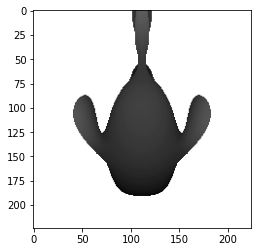

In [5]:
# Stack 20 depth images in tensor

import os

# print(os.listdir('drive/MyDrive/blub/depth_images/'))

def get_array(filepath):
  _img = cv2.imread('drive/MyDrive/blub/depth_images/' + filepath, 
                 cv2.IMREAD_ANYDEPTH)
  return preprocess(_img.astype('float32'))

dimg_stack = np.stack([np.reshape(get_array(path), (224, 224)) for path in os.listdir('drive/MyDrive/blub/depth_images/')])

print(dimg_stack.shape)
print(type(dimg_stack))
print(dimg_stack[0][100][60:100])

plt.imshow(dimg_stack[0], plt.get_cmap('binary'))

In [6]:
from torchvision.models import resnet

# ResNet50 (SIF Encoder)

# Hyperparameters
N = 32
M = 32

import torchvision.models as models

resnet50 = models.resnet50()

# Reshape input layer to accept 20 channel tensor
# Early-fusion ResNet50 immediately operates on all channels at once
resnet50.conv1 = torch.nn.Conv2d(20, 64, kernel_size=(7, 7), stride=(2, 2), 
                                 padding=(3, 3), bias=False)

# Reshape output layer to Nx10 dim.
resnet50.fc = torch.nn.Linear(in_features=2048, out_features=N*10, bias=True)

print(resnet50)
sifenc_activation = resnet50(torch.as_tensor(np.reshape(dimg_stack, (1, 20, 224, 224))))
print(sifenc_activation)

ResNet(
  (conv1): Conv2d(20, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1,

In [7]:

uniform_points_path = 'drive/MyDrive/blub/uniform_points.sdf'
surface_points_path = 'drive/MyDrive/blub/nss_points.sdf'
l = 4  # X, Y, Z, Signed Distance

# Read binary points file with numpy
with open(surface_points_path, 'rb') as f:
  points = np.fromfile(f, dtype=np.float32)

# Reshape from 1D to 2D, with l elements per row.
points = np.reshape(points, [-1, l])  

print(points)


[[ 0.07178451 -0.16262574  0.22459808  1.        ]
 [ 0.07103433 -0.15944836  0.22393681 -1.        ]
 [ 0.07610257 -0.16192588  0.23985809  1.        ]
 ...
 [-0.02198859 -0.05525433 -0.47846523  1.        ]
 [ 0.02008821  0.03421284 -0.38976157  1.        ]
 [ 0.01986465  0.03410792 -0.38988164 -1.        ]]


(100000, 4)


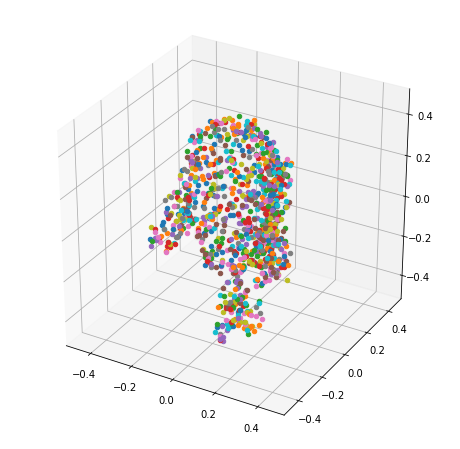

In [8]:

import tqdm
import random

# display points on plot

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')
ax.axes.set_xlim3d(left=-0.5, right=0.5)
ax.axes.set_ylim3d(bottom=-0.5, top=0.5)
ax.axes.set_zlim3d(bottom=-0.5, top=0.5)

print(points.shape)
for i in range(1000):
  point = random.choice(points)
  ax.scatter(point[0], point[1], point[2])

plt.show()


In [9]:

# Load input points (6 dim)

input_points_path = 'drive/MyDrive/blub/surface_samples_from_dodeca.pts'

d = 6  # X, Y, Z, Normal (3-dim)

# Read binary points file with numpy
with open(input_points_path, 'rb') as f:
  input_points = np.fromfile(f, dtype=np.float32)

# Reshape from 1D to 2D, with d elements per row.
input_points = np.reshape(input_points, [-1, d]) 

print(input_points)
print(input_points.shape)


[[-0.10158514 -0.03898259  0.43994308 -0.01690525  0.32197446  0.9465974 ]
 [-0.2546824  -0.01873982 -0.0689707  -0.58392775  0.64491975  0.4930588 ]
 [ 0.05254908  0.09330554 -0.22102967  0.17843527  0.4711021  -0.8638424 ]
 ...
 [ 0.04707396 -0.11927442 -0.17602049 -0.06880099  0.20174295 -0.9770191 ]
 [-0.02375379 -0.0531348  -0.44721687 -0.6547787   0.6687998   0.35209608]
 [ 0.00825943  0.15955934  0.30431578  0.5326192   0.73326737  0.42265326]]
(100000, 6)


(100000, 6)


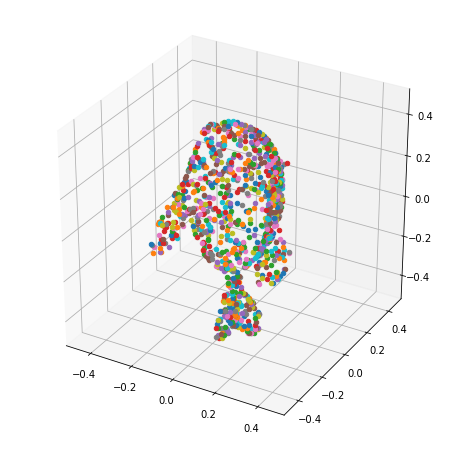

In [10]:
# display points on plot

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')
ax.axes.set_xlim3d(left=-0.5, right=0.5)
ax.axes.set_ylim3d(bottom=-0.5, top=0.5)
ax.axes.set_zlim3d(bottom=-0.5, top=0.5)

print(input_points.shape)
for i in range(1000):
  point = random.choice(input_points)
  ax.scatter(point[0], point[1], point[2])

plt.show()


# Generate transformation matrices from ResNet activation
Implementation of code in ldif/representation/structured_implicit_function.py (from_activation)


In [11]:

# First, we need to unflatten the vector into sets of analytic parameters

print(sifenc_activation.shape)

def unflatten_sifenc(activation):
  # Reshape into N sets of 10 params
  explicit_parameters = activation.reshape((1, N, 10))

  # Split each set into analytic "ellipsoid" parameters
  constant, center, radius = torch.split(
        explicit_parameters, [1, 3, 6], dim=-1)
  return constant, center, radius

# Unflatten vector
constant, center, radius = unflatten_sifenc(sifenc_activation)

print(constant.shape)
print(center.shape)
print(radius.shape)

# Everything checks out
print(constant[0][0][0], sifenc_activation[0][0])
print(center[0][0][0], sifenc_activation[0][1])
print(radius[0][0][0], sifenc_activation[0][4])


torch.Size([1, 320])
torch.Size([1, 32, 1])
torch.Size([1, 32, 3])
torch.Size([1, 32, 6])
tensor(-0.1152, grad_fn=<SelectBackward0>) tensor(-0.1152, grad_fn=<SelectBackward0>)
tensor(0.5234, grad_fn=<SelectBackward0>) tensor(0.5234, grad_fn=<SelectBackward0>)
tensor(0.2364, grad_fn=<SelectBackward0>) tensor(0.2364, grad_fn=<SelectBackward0>)


In [12]:

# Different parts of the analytic vector pass through different nonlinearities

# Scale scalar goes through negative abs val
constant = -torch.abs(constant)

# Center gets divided by 2
center = center / 2.0

# Radius values go through sigmoid (they are all between 0 and 1, as it's about 
# the ratio)
# Use ellipsis to take from last dimension
radius_var = torch.sigmoid(radius[..., 0:3])
max_blob_radius = 0.15  # Other operations from LDIF
radius_var *= max_blob_radius
radius_var = radius_var * radius_var

# Radius tilts go through clip function -- restrict to all possible motion
max_euler_angle = np.pi / 4.0
radius_rot = torch.clip(radius[..., 3:], -max_euler_angle,
                                    max_euler_angle)

# Concatenate radius variables
radius = torch.cat([radius_var, radius_rot], axis=-1)

# Everything checks out
print(constant.shape)
print(center.shape)
print(radius_var.shape)
print(radius_rot.shape)
print(radius.shape)


torch.Size([1, 32, 1])
torch.Size([1, 32, 3])
torch.Size([1, 32, 3])
torch.Size([1, 32, 3])
torch.Size([1, 32, 6])


In [197]:

# Manually set the analytic vector at feature index 0 to test the transformation

constant[0][0] = torch.tensor([0])
center[0][0] = torch.tensor([0, 0, 0])  # Some values (I think x and y) are negated
radius_var[0][0] = torch.tensor([0.9, 0.9, 0.9])
radius_rot[0][0] = torch.tensor([0, 0, 0.3])  # BUG IN THIS MATRIX CALCULATION


In [198]:

# Apply transformation matrices -- compute world2local (Ti transformation)

# Convert center coordinates into 4x4 transformation matrix
batch_size = 1
tx = torch.eye(3).reshape(1, 3, 3).repeat(
    N, 1, 1).reshape(1, N, 3, 3).repeat(
    batch_size, 1, 1, 1)  # (1, 32, 3, 3)
print(tx.shape)
print(tx[0][0])
centers = torch.reshape(center,
                    [batch_size, N, 3, 1])  # (1, 32, 3, 1)
tx = torch.concat([tx, -centers], axis=-1)  # (1, 32, 3, 4)
print(tx[0][0])
lower_row = torch.tensor(
    np.tile(
        np.reshape(np.array([0., 0., 0., 1.]), [1, 1, 1, 4]),
        [batch_size, N, 1, 1]),
    dtype=torch.float32)  # (1, 32, 1, 4)
# log.info('lower_row: %s' % lower_row)
tx = torch.concat([tx, lower_row], axis=-2)
print(tx[0][0])

print(tx.shape)


torch.Size([1, 32, 3, 3])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[1., 0., 0., -0.],
        [0., 1., 0., -0.],
        [0., 0., 1., -0.]], grad_fn=<SelectBackward0>)
tensor([[1., 0., 0., -0.],
        [0., 1., 0., -0.],
        [0., 0., 1., -0.],
        [0., 0., 0., 1.]], grad_fn=<SelectBackward0>)
torch.Size([1, 32, 4, 4])


In [199]:

# Compute rotation matrix from radius_rot
print(radius_rot.shape)

cosines = torch.cos(radius_rot)  # (1, 32, 3)
sines = torch.sin(radius_rot)  # (1, 32, 3)

cx, cy, cz = torch.unbind(cosines, dim=-1)  # (1, 32) each
sx, sy, sz = torch.unbind(sines, dim=-1)  # (1, 32) each

rotation = torch.stack(
    [cz * cy, cz * sy * sx - sz * cx, cz * sy * cx + sz * sx,
      sz * cy, sz * sy * sx + cz * cx, sz * sy * cx - cz * sx,
      -sy, cy * sx, cy * cx], dim=-1)  # (1, 32, 9)
shape = torch.cat([torch.tensor(rotation.shape)[:-1], torch.tensor([3, 3])], 
                  dim=0)  # (4,)

rotation = torch.reshape(rotation, tuple(i for i in shape))  # (1, 32, 3, 3)

print('rotation:', rotation.shape)

# Everything checks out
print('\nradius rotation variables: ', end='')
print(radius_rot[0][0])
print('\nRotation Matrix:\n' + str(rotation[0][0]))


torch.Size([1, 32, 3])
rotation: torch.Size([1, 32, 3, 3])

radius rotation variables: tensor([0.0000, 0.0000, 0.3000], grad_fn=<SelectBackward0>)

Rotation Matrix:
tensor([[ 0.9553, -0.2955,  0.0000],
        [ 0.2955,  0.9553,  0.0000],
        [-0.0000,  0.0000,  1.0000]], grad_fn=<SelectBackward0>)


In [200]:

# Compute scale matrix from radius_var (constant not used, only used in 
# analytic params)
print(radius_var.shape, constant.shape)

diag = 1.0 / (torch.sqrt(radius_var + 1e-8) + 1e-8)
scale = torch.diag_embed(diag)  # (1, 32, 3, 3)

print(scale.shape)

# Everything checks out
print(radius_var[0][0])
print(scale[0][0])


torch.Size([1, 32, 3]) torch.Size([1, 32, 1])
torch.Size([1, 32, 3, 3])
tensor([0.9000, 0.9000, 0.9000], grad_fn=<SelectBackward0>)
tensor([[1.0541, 0.0000, 0.0000],
        [0.0000, 1.0541, 0.0000],
        [0.0000, 0.0000, 1.0541]], grad_fn=<SelectBackward0>)


In [201]:

def homogenize(m):  # (1, 32, 3, 3)
  print(type(m))
  """Adds homogeneous coordinates to a [..., N,N] matrix."""
  batch_rank = len([i for i in m.shape]) - 2
  batch_dims = [i for i in m.shape][:-2]  # ex: [1, 32]
  n = [i for i in m.shape][-1]
  assert [i for i in m.shape][-2] == n
  right_col = np.zeros(batch_dims + [3, 1], dtype=np.float32)  # (1, 32, 3, 1)
  m = torch.cat([m, torch.tensor(right_col)], axis=-1)  # (1, 32, 3, 4)
  lower_row = np.pad(
      np.zeros(batch_dims + [1, 3], dtype=np.float32),
      [(0, 0)] * batch_rank + [(0, 0), (0, 1)],
      mode='constant',
      constant_values=1.0)
  lower_row = torch.tensor(lower_row)  # (1, 32, 1, 4)
  # print(lower_row.shape)
  return torch.concat([m, lower_row], axis=-2)  # (1, 32, 4, 4)

# Compute full transformation matrix
print(scale.shape)
print(rotation.shape)
tx3x3 = torch.matmul(scale, rotation)  # (1, 32, 3, 3)
print(tx.shape)
transformation_matrix = torch.matmul(homogenize(tx3x3), tx)  # (1, 32, 4, 4)

# Follow a single matrix through the operations
print(scale[0][0])
print(rotation[0][0])
print(tx3x3[0][0])
print(homogenize(tx3x3)[0][0])
print(tx[0][0])
print(transformation_matrix[0][0])


torch.Size([1, 32, 3, 3])
torch.Size([1, 32, 3, 3])
torch.Size([1, 32, 4, 4])
<class 'torch.Tensor'>
tensor([[1.0541, 0.0000, 0.0000],
        [0.0000, 1.0541, 0.0000],
        [0.0000, 0.0000, 1.0541]], grad_fn=<SelectBackward0>)
tensor([[ 0.9553, -0.2955,  0.0000],
        [ 0.2955,  0.9553,  0.0000],
        [-0.0000,  0.0000,  1.0000]], grad_fn=<SelectBackward0>)
tensor([[ 1.0070, -0.3115,  0.0000],
        [ 0.3115,  1.0070,  0.0000],
        [ 0.0000,  0.0000,  1.0541]], grad_fn=<SelectBackward0>)
<class 'torch.Tensor'>
tensor([[ 1.0070, -0.3115,  0.0000,  0.0000],
        [ 0.3115,  1.0070,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0541,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000]], grad_fn=<SelectBackward0>)
tensor([[1., 0., 0., -0.],
        [0., 1., 0., -0.],
        [0., 0., 1., -0.],
        [0., 0., 0., 1.]], grad_fn=<SelectBackward0>)
tensor([[ 1.0070, -0.3115,  0.0000,  0.0000],
        [ 0.3115,  1.0070,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1

In [202]:
# Get 10k point surface sample of input, as in ldif/inference/example.py's 
# precomputed_surface_samples_from_dodeca

print(input_points.shape)

sample_count = 10000

# All points are valid -- sample randomly
surface_samples_10k = input_points[np.random.choice(len(input_points), 
                                  sample_count, replace=False), :]

# surface_samples_10k = torch.tensor(surface_samples_10k)
surface_pt_samples_10k = torch.tensor(surface_samples_10k[:, :3])
print(surface_pt_samples_10k.shape)

# _a1 = np.random.rand(6, 2)
# print(_a1)
# print(_a1[np.random.choice(6, 4, replace=False), :])


(100000, 6)
torch.Size([10000, 3])


In [203]:

# Apply transformation matrix to point cloud, generating localized ones

def to_homogeneous(t, is_point):
  """Makes a homogeneous space tensor given a tensor with ultimate coordinates.

  Args:
    t: Tensor with shape [..., K], where t is a tensor of points in
      K-dimensional space.
    is_point: Boolean. True for points, false for directions

  Returns:
    Tensor with shape [..., K+1]. t padded to be homogeneous.
  """
  padding = 1 if is_point else 0
  rank = len([i for i in t.shape])

  paddings = (0, 1)
  return torch.nn.functional.pad(
      t, paddings, mode='constant', value=padding
  )

# Expand global_points tensor to have a global point cloud for each element (that can then be transformed)
tiled_global = torch.tile(
    torch.unsqueeze(to_homogeneous(surface_pt_samples_10k, is_point=True), dim=0),  # (1, 1, 10000, 4)
    (1, N, 1, 1))  # (1, 32, 10000, 4)
print(tiled_global.shape)
# print('tiled_global', tiled_global.shape)
# Apply transformation matrix
print(transformation_matrix.shape)
print(transformation_matrix[0][0])
all_local_points = torch.matmul(tiled_global, torch.transpose(transformation_matrix, -2, -1))  # , transpose_b=True)

print(all_local_points.shape)
print(all_local_points[0][0][0][0])

torch.Size([1, 32, 10000, 4])
torch.Size([1, 32, 4, 4])
tensor([[ 1.0070, -0.3115,  0.0000,  0.0000],
        [ 0.3115,  1.0070,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0541,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  1.0000]], grad_fn=<SelectBackward0>)
torch.Size([1, 32, 10000, 4])
tensor(-0.1360, grad_fn=<SelectBackward0>)


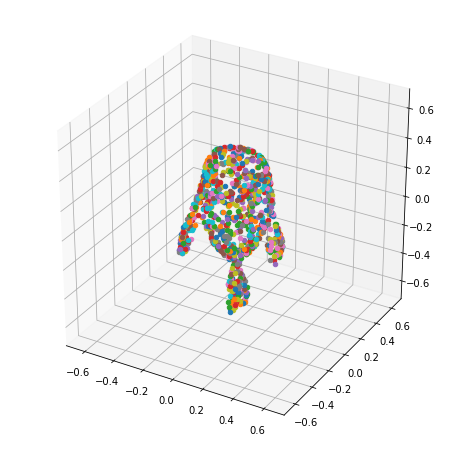

In [204]:

# Plot transformation

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')
box_size = 0.7
ax.axes.set_xlim3d(left=-box_size, right=box_size)
ax.axes.set_ylim3d(bottom=-box_size, top=box_size)
ax.axes.set_zlim3d(bottom=-box_size, top=box_size)

# print(all_local_points[0][0][0][0])
for i in range(1000):
  point = random.choice(all_local_points[0][0])
  # print(point[0].item())
  ax.scatter(point[0].item(), point[1].item(), point[2].item())

plt.show()


In [205]:

# Compare transformation to official TF implementation of LDIF transformation

import tensorflow as tf


def roll_pitch_yaw_to_rotation_matrices(roll_pitch_yaw):
  """Converts roll-pitch-yaw angles to rotation matrices.

  Args:
    roll_pitch_yaw: Tensor (or convertible value) with shape [..., 3]. The last
      dimension contains the roll, pitch, and yaw angles in radians.  The
      resulting matrix rotates points by first applying roll around the x-axis,
      then pitch around the y-axis, then yaw around the z-axis.

  Returns:
     Tensor with shape [..., 3, 3]. The 3x3 rotation matrices corresponding to
     the input roll-pitch-yaw angles.
  """
  # print(type(roll_pitch_yaw))
  roll_pitch_yaw = tf.convert_to_tensor(roll_pitch_yaw)

  cosines = tf.cos(roll_pitch_yaw)  # (1, 32, 3)
  sines = tf.sin(roll_pitch_yaw)  # (1, 32, 3)
  cx, cy, cz = tf.unstack(cosines, axis=-1)  # (1, 32) each
  sx, sy, sz = tf.unstack(sines, axis=-1)  # (1, 32) each
  rotation = tf.stack(
      [cz * cy, cz * sy * sx - sz * cx, cz * sy * cx + sz * sx,
       sz * cy, sz * sy * sx + cz * cx, sz * sy * cx - cz * sx,
       -sy, cy * sx, cy * cx], axis=-1)  # (1, 32, 9)
  shape = tf.concat([tf.shape(rotation)[:-1], [3, 3]], axis=0)  # (4,)
  rotation = tf.reshape(rotation, shape)  # (1, 32, 3, 3)
  return rotation


def _homogenize(m):
  # log.info('m: %s' % m)  # (1, 32, 3, 3)
  """Adds homogeneous coordinates to a [..., N,N] matrix."""
  batch_rank = len(m.get_shape().as_list()) - 2
  batch_dims = m.get_shape().as_list()[:-2]
  n = m.get_shape().as_list()[-1]
  assert m.get_shape().as_list()[-2] == n
  right_col = np.zeros(batch_dims + [3, 1], dtype=np.float32)  # (1, 32, 3, 1)
  # log.info('right_col: %s' % str(right_col.shape))
  m = tf.concat([m, right_col], axis=-1)  # (1, 32, 3, 4)
  lower_row = np.pad(
      np.zeros(batch_dims + [1, 3], dtype=np.float32),
      [(0, 0)] * batch_rank + [(0, 0), (0, 1)],
      mode='constant',
      constant_values=1.0)
  lower_row = tf.constant(lower_row)  # (1, 32, 1, 4)
  # log.info('lower_row: %s' % lower_row)
  # log.info('tf.concat([m, lower_row], axis=-2): %s' % tf.concat([m, lower_row], axis=-2))
  return tf.concat([m, lower_row], axis=-2)  # (1, 32, 4, 4)


_constant = constant.detach().numpy()
_center = center.detach().numpy()
_radius_var = radius_var.detach().numpy()
_radius_rot = radius_rot.detach().numpy()

print(_constant.shape, _center.shape, _radius_var.shape, _radius_rot.shape)

# log.info('Computing world2local from centers.')
tx = tf.eye(3, batch_shape=[1, N])  # (1, 32, 3, 3)
# log.info('tx: %s' % tx)
centers = tf.reshape(tf.constant(_center),
                      [1, N, 3, 1])  # (1, 32, 3, 1)
# log.info('centers: %s' % centers)
tx = tf.concat([tx, -centers], axis=-1)  # (1, 32, 3, 4)
# log.info('tx: %s' % tx)
lower_row = tf.constant(
    np.tile(
        np.reshape(np.array([0., 0., 0., 1.]), [1, 1, 1, 4]),
        [1, N, 1, 1]),
    dtype=tf.float32)  # (1, 32, 1, 4)
# log.info('lower_row: %s' % lower_row)
tx = tf.concat([tx, lower_row], axis=-2)
# log.info('tx: %s' % tx)  # (1, 32, 4, 4)

# Apply the inverse rotation:
rotation = tf.linalg.inv(
    roll_pitch_yaw_to_rotation_matrices(_radius_rot))  # (1, 32, 3, 3)

# DEBUG
print('\nRotation Matrix:\n' + str(rotation[0][0]))

# Compute a scale transformation if necessary (True in LDIF):
diag = _radius_var  # (1, 32, 3)
diag = 1.0 / (tf.sqrt(diag + 1e-8) + 1e-8)
scale = tf.linalg.diag(diag)  # (1, 32, 3, 3)

# Apply both transformations and return the transformed points.
tx3x3 = tf.matmul(scale, rotation)
tf_transformation_matrix = tf.matmul(_homogenize(tx3x3), tx)


(1, 32, 1) (1, 32, 3) (1, 32, 3) (1, 32, 3)

Rotation Matrix:
tf.Tensor(
[[ 0.9553365   0.29552022  0.        ]
 [-0.2955202   0.95533645  0.        ]
 [ 0.          0.          1.        ]], shape=(3, 3), dtype=float32)


(1, 32, 10000, 4)


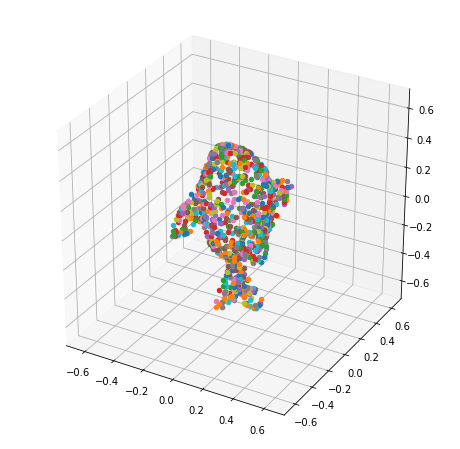

In [206]:

# Test TF-implemented transform

# print(tiled_global)
_tiled_global = tf.convert_to_tensor(tiled_global.detach().numpy())
# print(_tiled_global)
_all_local_points = tf.matmul(_tiled_global, tf_transformation_matrix,
                              transpose_b=True)
print(_all_local_points.shape)

# Plot transformation

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')
box_size = 0.7
ax.axes.set_xlim3d(left=-box_size, right=box_size)
ax.axes.set_ylim3d(bottom=-box_size, top=box_size)
ax.axes.set_zlim3d(bottom=-box_size, top=box_size)

# print(_all_local_points[0][0][0][0])
for i in range(1000):
  point = random.choice(_all_local_points[0][0])
  # print(point[0].item())
  ax.scatter(point[0], point[1], point[2])

plt.show()


In [207]:
import tensorflow as tf

def to_homogeneous(t, is_point):
  """Makes a homogeneous space tensor given a tensor with ultimate coordinates.

  Args:
    t: Tensor with shape [..., K], where t is a tensor of points in
      K-dimensional space.
    is_point: Boolean. True for points, false for directions

  Returns:
    Tensor with shape [..., K+1]. t padded to be homogeneous.
  """
  padding = 1 if is_point else 0
  rank = len(t.get_shape().as_list())
  paddings = []
  for _ in range(rank):
    paddings.append([0, 0])
  paddings[-1][1] = 1
  # print('paddings:', paddings)

  print(torch.nn.functional.pad(
      torch.tensor(t), (0, 1), value=1.0
  ))
  return tf.pad(
      t, tf.constant(paddings), mode='CONSTANT', constant_values=padding)

inp_t = torch.rand((1, 10000, 3))
print(inp_t)
test_tensor = tf.expand_dims(to_homogeneous(inp_t, is_point=True), axis=1)

print(test_tensor)

tensor([[[7.3903e-01, 1.7477e-02, 5.7548e-04],
         [9.7304e-01, 3.1456e-02, 4.0778e-01],
         [2.8958e-02, 3.6156e-01, 9.2756e-01],
         ...,
         [1.6596e-01, 4.1649e-01, 8.0018e-01],
         [1.4284e-01, 5.1054e-01, 5.9544e-01],
         [5.9950e-01, 6.4828e-01, 7.2001e-01]]])


AttributeError: ignored

In [ ]:

import tensorflow as tf

a1 = tf.random.normal((1, 32, 9))
print(rotation.shape[:-1])
a2 = tf.concat([rotation.shape[:-1], [3, 3]], axis=0)

print(a1.shape, a2.shape)
print(tf.reshape(a1, a2).shape)

